<a href="https://colab.research.google.com/github/gaurav21s/deep-learning-basic/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
import tensorflow as tf
#!pip install --upgrade tensorflow==2.0-rc1

In [42]:
from tensorflow import keras

In [43]:
fm = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)= fm.load_data()

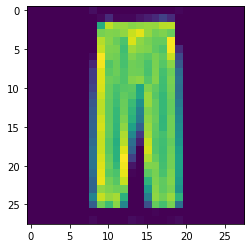

In [44]:
plt.imshow(X_train_full[21])

In [45]:
y_train_full[21]

1

In [46]:
class_names=['Tshirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [47]:
class_names[y_train_full[21]]

'Trouser'

In [48]:
X_train_n=X_train_full/255.
X_test_n=X_test/255.

In [49]:
X_valid,X_train=X_train_n[:5000],X_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test_n

In [50]:
np.random.seed(21)
tf.random.set_seed(21)


In [51]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(500,activation="relu"))
model.add(keras.layers.Dense(350,activation="relu"))
model.add(keras.layers.Dense(150,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_5 (Dense)              (None, 350)               175350    
_________________________________________________________________
dense_6 (Dense)              (None, 150)               52650     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1510      
Total params: 622,010
Trainable params: 622,010
Non-trainable params: 0
_________________________________________________________________


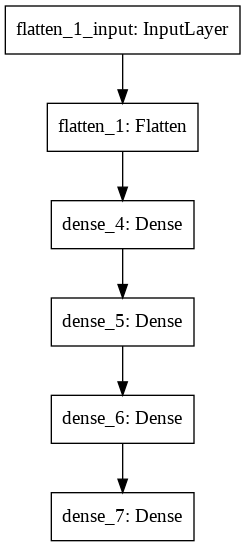

In [53]:
import pydot
keras.utils.plot_model(model)

In [54]:
weights, biases=model.layers[2].get_weights()

In [55]:
weights.shape

(500, 350)

In [56]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [57]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=['accuracy'])

In [58]:
history=model.fit(X_train,y_train,epochs=50,
                  validation_data=(X_valid,y_valid))

Epoch 1/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7065 - accuracy: 0.7625 - val_loss: 0.4843 - val_accuracy: 0.8328
Epoch 2/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4670 - accuracy: 0.8353 - val_loss: 0.4182 - val_accuracy: 0.8572
Epoch 3/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4196 - accuracy: 0.8514 - val_loss: 0.3995 - val_accuracy: 0.8652
Epoch 4/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3907 - accuracy: 0.8621 - val_loss: 0.4133 - val_accuracy: 0.8486
Epoch 5/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3705 - accuracy: 0.8673 - val_loss: 0.3675 - val_accuracy: 0.8712
Epoch 6/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3530 - accuracy: 0.8723 - val_loss: 0.3794 - val_accuracy: 0.8650
Epoch 7/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3379 - accuracy: 0.8790 - val_loss: 0.3706 - val_accuracy:

In [59]:
history.params

{'epochs': 50, 'steps': 1719, 'verbose': 1}

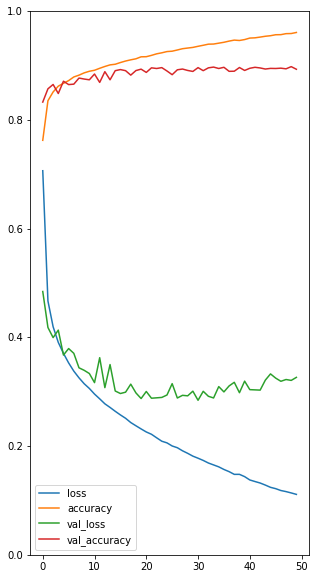

In [60]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(5,10))
plt.gca().set_ylim(0,1)
plt.show()

In [61]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3497 - accuracy: 0.8879


[0.3497471809387207, 0.8878999948501587]

In [74]:
X_new=X_test[15:22]

In [75]:
yproba=model.predict(X_new)
yproba.round(2)

array([[0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.97, 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.88, 0.  , 0.  , 0.03, 0.  , 0.  , 0.08, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [76]:
classes=np.argmax(yproba,axis=1)

In [77]:
np.array(class_names)[classes]

array(['Trouser', 'Pullover', 'Pullover', 'Bag', 'Tshirt', 'Pullover',
       'Sandal'], dtype='<U10')

AxesImage(54,36;334.8x217.44)


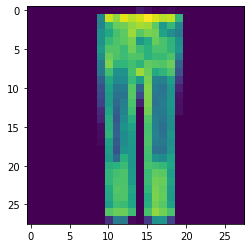

In [82]:
print(plt.imshow(X_test[15]))